In [29]:
import numpy as np
import probnum as pn
from scipy.integrate import odeint
import matplotlib.pyplot as plt

Premise:
probabilistic solvers return structured error estimates (in particular, the ability to return joint posterior samples, i.e. multiple realistic hypotheses for the true unknown solution of the problem). We want to investigate situations in which this becomes necessary.

Q1 : At what step size do we need to start worrying about inaccurate estimates of the ODE's solution?

In [120]:
def beta(t):
    return (1 + np.tanh((1/2) * np.sin((1/20) * t) + (1/6) * np.cos((1/20 + 0.1) * t)))/5

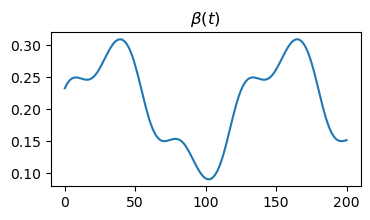

In [121]:
t0 = 0.0
tmax = 200.0
tspan = np.linspace(t0, tmax, 200)
y0 = np.array([999, 1, 0])

plt.figure(figsize=(4,2))
plt.plot(tspan, beta(tspan))
plt.title(r"$\beta(t)$");

In [122]:
gamma = 0.1
N = 1000
    
def f(t, y):
    S, I, R = y
    
    dS = -beta(t) * S * I / N
    dI = beta(t) * S * I / N - gamma * I
    dR = gamma * I
    return np.array([dS, dI, dR])

def df(t, y):
    S, I, R = y
    
    r1 = np.array([-beta(t) * I / N, -beta(t) * S / N, 0])
    r2 = np.array([beta(t) * I / N, beta(t) * S / N - gamma, 0])
    r3 = np.array([0, gamma, 0])
    
    return np.stack([r1, r2, r3])

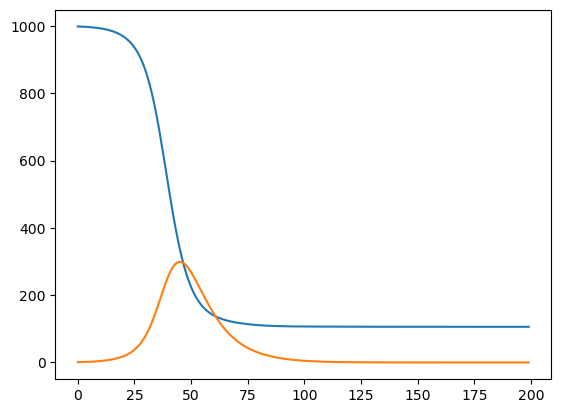

In [123]:
S, I, R = odeint(f, y0, tspan, tfirst = True).T
plt.plot(S)
plt.plot(I)

In [102]:


sol = pn.diffeq.probsolve_ivp(f, t0, tmax, y0, df=df,
                              algo_order=2, method="EK1",
                             adaptive = False, step = 1.0)

TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

In [52]:
tspan = np.linspace(t0, tmax, 200)
mean = sol(tspan).mean
err = 2 * np.sqrt(sol(tspan).cov[:, [0,1,2], [0,1,2]]) #diagonal (variance)

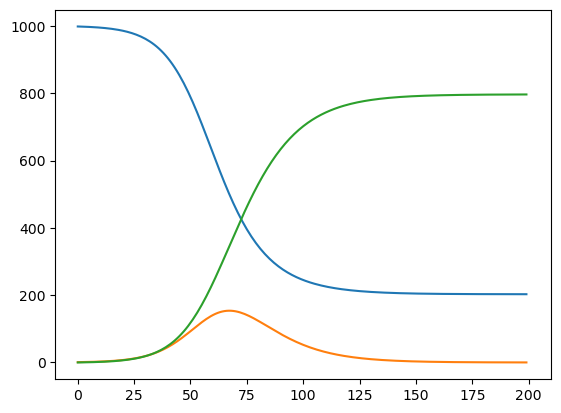

In [53]:
for (x, dx) in zip(mean.T, err.T):
    plt.fill_between(tspan, y1 = x - dx, y2 = x + dx)
    plt.plot(x)